In [1]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from matplotlib import style
from symbols import load_ticker, save_ticker
from algorithm import calc_absolute_momentum


# disable pandas warning 
pd.options.mode.chained_assignment = None

In [23]:
action = 5      # how often do we evaluate and 'take' action
lookback = 253   # what is te lookback duration 
ticker = 'SPY'   # the ticker

# dates to back test
start_date = '1970-01-01'  
end_date = dt.datetime.now().strftime('%Y-%m-%d') 


In [3]:
# folders
TICKERS_FOLDER = '.\\data\\tickers'     # tickers folder
OUTPUT_FOLDER = '.\\data\\output'       # result folder 


In [20]:
# read from csv
df = load_ticker(ticker, start_date, end_date, TICKERS_FOLDER, False)
print(df)


High         Low        Open       Close      Volume  \
Date                                                                     
2002-07-30   81.900002   81.519997   81.750000   81.519997      6100.0   
2002-07-31   82.800003   81.900002   81.949997   82.529999     29400.0   
2002-08-01   83.019997   82.540001   82.540001   83.000000     25000.0   
2002-08-02   84.099998   82.879997   83.160004   83.849998     52800.0   
2002-08-05   84.440002   83.849998   84.040001   84.220001     61100.0   
...                ...         ...         ...         ...         ...   
2020-06-12  163.660004  162.050003  162.410004  162.300003   9716100.0   
2020-06-15  164.220001  162.139999  163.889999  162.389999   7759800.0   
2020-06-16  161.229996  158.699997  159.410004  159.899994  13698900.0   
2020-06-17  160.770004  159.339996  160.270004  160.559998   7112500.0   
2020-06-18  162.479996  161.610001  162.039993  162.259995   7690300.0   

             Adj Close  
Date                    
2002-

In [24]:
df_res = calc_absolute_momentum(df, action, lookback)
print(df_res)


Close  Daily return  lookback window Abs Close RISK
Date                                                                
2002-07-30   81.519997           NaN              NaN               
2002-07-31   82.529999      0.012390              NaN               
2002-08-01   83.000000      0.005695              NaN               
2002-08-02   83.849998      0.010241              NaN               
2002-08-05   84.220001      0.004413              NaN               
...                ...           ...              ...       ...  ...
2020-06-12  162.300003     -0.009641         0.241965               
2020-06-15  162.389999      0.000555         0.238389               
2020-06-16  159.899994     -0.015333         0.216339               
2020-06-17  160.559998      0.004128         0.219227               
2020-06-18  162.259995      0.010588         0.225992               

[4504 rows x 5 columns]
start algo run from 253 until 4504
still running - 293
still running - 343
still running - 393


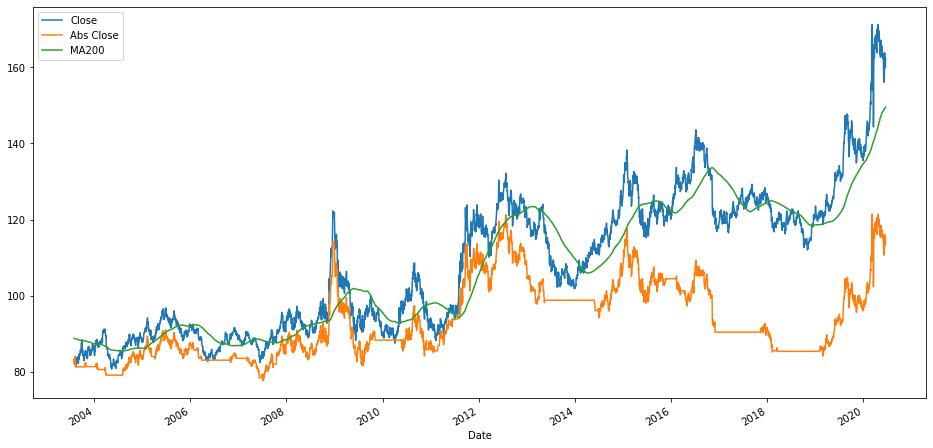

In [26]:
df_res['MA200'] = df_res['Close'].rolling(200).mean()
df_res.dropna()[['Close','Abs Close', 'MA200']].plot(label=ticker, figsize=(16,8))
#df_res['Abs Close'].plot(label=ticker, figsize=(16,8))